In [2]:
import os
train_dir = 'D:/HRT/cars ku/cars_train'
test_dir = 'D:/HRT/cars ku/cars_test'
iscar_train_dir = 'D:/HRT/cars ku/cars_train/iscars_train'
nocar_train_dir = 'D:/HRT/cars ku/cars_train/nocars_train'
iscar_test_dir = 'D:/HRT/cars ku/cars_test/iscars_test'
nocar_test_dir = 'D:/HRT/cars ku/cars_test/nocars_test'
print('total training car images:', len(os.listdir(iscar_train_dir))) 
print('total training nocar images:', len(os.listdir(nocar_train_dir)))
print('total testing car images:', len(os.listdir(iscar_test_dir))) 
print('total testing nocar images:', len(os.listdir(nocar_test_dir)))

total training car images: 16
total training nocar images: 5
total testing car images: 16
total testing nocar images: 5


In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [17]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
 optimizer=optimizers.RMSprop(lr=1e-4),
 metrics=['acc'])

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255) 
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
train_dir, 
target_size=(150, 150), 
batch_size=20,
class_mode='binary') 
validation_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 21 images belonging to 2 classes.
Found 21 images belonging to 2 classes.


In [19]:
history = model.fit_generator(
train_generator,
steps_per_epoch=20,
epochs=2,
validation_data=validation_generator,
validation_steps=50)

Epoch 1/2
20/20 [==============================] - 142s 7s/step - loss: 0.4951 - acc: 0.7931 - val_loss: 0.5369 - val_acc: 0.7619
Epoch 2/2
20/20 [==============================] - 2473s 124s/step - loss: 0.6797 - acc: 0.6434 - val_loss: 0.5094 - val_acc: 0.7619


In [13]:
model.save('cars.h5')

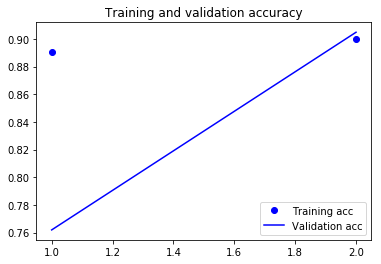

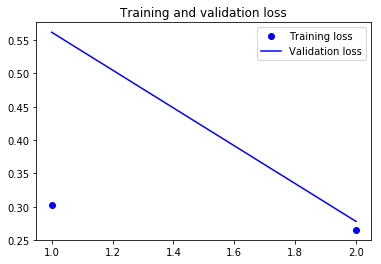

In [14]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()